In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download rohanrao/air-quality-data-in-india
! unzip air-quality-data-in-india.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
air-quality-data-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  air-quality-data-in-india.zip
replace city_day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
import time
import requests
import sys
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import csv

In [ ]:
aqi_data=pd.read_csv("city_day.csv")
aqi_data=aqi_data[aqi_data['City']=="Delhi"]
aqi_data.reset_index(inplace=True)
aqi_data=aqi_data.iloc[:1826]
aqi_data.drop(labels="index",axis=1,inplace=True)
aqi_data


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20,372.0,Very Poor
1822,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40,425.0,Severe
1823,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34,455.0,Severe
1824,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72,506.0,Severe


In [ ]:
def retrieve_html():
    for year in range(2015,2020):
        for month in range(1,13):
            if(month<10):
                url=f"http://en.tutiempo.net/climate/0{month}-{year}/ws-421820.html"
            else:
                url=f"http://en.tutiempo.net/climate/{month}-{year}/ws-421820.html"
            texts=requests.get(url)
            text_utf=texts.text.encode('utf=8')

            if not os.path.exists(f"/content/drive/MyDrive/AQI_Priyamvada/Data/Html_Data/{year}"):
                os.makedirs(f"/content/drive/MyDrive/AQI_Priyamvada/Data/Html_Data/{year}")
            with open(f"/content/drive/MyDrive/AQI_Priyamvada/Data/Html_Data/{year}/{month}.html","wb") as output:
                output.write(text_utf)

        sys.stdout.flush()

In [ ]:
# start_time=time.time()

# retrieve_html()

# stop_time=time.time()
# print(f"Time taken {stop_time-start_time}")

In [ ]:
# def avg_data():
#   year_data={}
#   for year in range(2015,2020):
#     # temp_i=0
#     average=[]
#     for rows in pd.read_csv(f'/content/drive/MyDrive/AQI_Priyamvada/Data/AQI/aqi{year}.csv',chunksize=24):
#         add_var=0
#         avg=0.0
#         data=[]
#         counter=0
#         df=pd.DataFrame(data=rows)
#         for index,row in df.iterrows():
#             data.append(row['PM2.5'])
#         for i in data:
#             if type(i) is float or type(i) is int:
#                 add_var=add_var+i
#                 counter=counter+1
#             elif type(i) is str:
#                 if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
#                     temp=float(i)
#                     add_var=add_var+temp
#                     counter=counter+1
#         if counter!=0:
#           avg=add_var/counter
#         else:
#           avg=add_var
#         # temp_i=temp_i+1

#         average.append(avg)
#     year_data.update({year:average})
#   return year_data
# year_data=avg_data()
# len(avg_data())
# year_data.keys()
# len(year_data.get(2018))
# lst2013=year_data.get(2015)
# lst2014=year_data.get(2016)
# lst2015=year_data.get(2017)
# lst2016=year_data.get(2018)
# lst2017=year_data.get(2019)
# plt.plot(range(0,365),lst2013,label="2013 data")
# plt.plot(range(0,364),lst2014,label="2014 data")
# plt.plot(range(0,365),lst2015,label="2015 data")
# plt.plot(range(0,365),lst2016,label="2016 data")
# plt.xlabel('Day')
# plt.ylabel('PM 2.5')
# plt.legend(loc='upper right')
# plt.savefig('plots.png')
# plt.show()

In [ ]:
names=['Day', 'T', 'TM', 'Tm','SLP','H','PP','VV','V','VM','VG','RA','SN','TS','FG']
names

['Day',
 'T',
 'TM',
 'Tm',
 'SLP',
 'H',
 'PP',
 'VV',
 'V',
 'VM',
 'VG',
 'RA',
 'SN',
 'TS',
 'FG']

In [ ]:
# counter=0
# df=pd.DataFrame(columns=names)
# for month in range(1,13):
#   file_html = open(f'/content/drive/MyDrive/AQI_Priyamvada/Data/Html_Data/2013/{month}.html', 'rb')
#   plain_text = file_html.read()
#   tempD = []
#   soup = BeautifulSoup(plain_text, "lxml")

#   for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
#     for tbody in table:
#       for tr in tbody:
#         a = tr.get_text()
#         tempD.append(a)

#   tempD=tempD[:-16]
#   tempD
#   n=15
#   for i in range(round(len(tempD)/15)-1):
#     listt=tempD[n:n+15]
#     df.loc[counter] = listt
#     n=n+15
#     counter=counter+1

# df.drop(['Day', 'PP', 'VG', 'RA', 'SN', 'TS', 'FG'], axis = 1, inplace=True)
# df['PM 2.5']=year_data.get(2013)

In [ ]:
counter=0
df=pd.DataFrame(columns=names)
for year in range(2015,2020):
  for month in range(1,13):
    file_html = open(f'/content/drive/MyDrive/AQI_Priyamvada/Data/Html_Data/{year}/{month}.html', 'rb')
    plain_text = file_html.read()
    tempD = []
    soup = BeautifulSoup(plain_text, "lxml")

    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
      for tbody in table:
        for tr in tbody:
          a = tr.get_text()
          tempD.append(a)

    tempD=tempD[:-16]
    tempD
    n=15
    for i in range(round(len(tempD)/15)-1):
      listt=tempD[n:n+15]
      df.loc[counter] = listt
      n=n+15
      counter=counter+1
  # df['PM 2.5']=year_data.get(year)

df.drop(['Day', 'PP', 'VG', 'RAbeu', 'SN', 'TS', 'FG'], axis = 1, inplace=True)

In [ ]:
# year_total=list

In [ ]:
df["PM2.5"]=aqi_data["PM2.5"]

In [ ]:
df.to_csv("Complete_dataframe.csv")

In [ ]:
# pp=0
# for (columnName, columnData) in mf.iteritems():
#   pp=pp+1
#   print(pp)

# (len(mf[columnName][i])==0)
# mf[columnName][i]=='' or mf[columnName][i]=='-':

In [ ]:
mf=df.copy()
mf.reset_index(inplace=True,drop=False)
mf.reset_index(inplace=True,drop=True)
# mf.reset_index(inplace=True)

,index,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,0,14.9,21.6,8.8,1017.4,76,0.8,0.9,7.6,313.22
1,1,14.7,21.6,10.2,1018.1,97,0.6,3.1,9.4,186.18
2,2,15,16.8,13.6,1017.5,94,0.5,0.9,7.6,87.18
3,3,,,,,,,,,151.84
4,4,,,,,,,,,146.60
...,...,...,...,...,...,...,...,...,...,...
1821,1821,8.6,13.6,4.2,1019.6,83,0.6,3.3,7.6,240.07
1822,1822,,,,,,,,,275.60
1823,1823,,,,,,,,,326.79
1824,1824,,,,,,,,,333.43


NameError: ignored

In [ ]:
mf=df.copy()
a=len(mf)
for (columnName, columnData) in mf.iteritems():
  for i in range(len(mf)):
    if (mf[columnName][i]=='') or (mf[columnName][i]=='-') :
      mf.drop(i,inplace=True,axis=0)
  mf.reset_index(inplace=True,drop=True)
  mf[columnName]=pd.to_numeric(mf[columnName])
mf.dropna(axis=0,how='any',inplace=True)
mf.reset_index(inplace=True,drop=True)

In [ ]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       893 non-null    float64
 1   TM      893 non-null    float64
 2   Tm      893 non-null    float64
 3   SLP     893 non-null    float64
 4   H       893 non-null    int64  
 5   VV      893 non-null    float64
 6   V       893 non-null    float64
 7   VM      893 non-null    float64
 8   PM2.5   893 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 62.9 KB


In [ ]:
import seaborn as sns

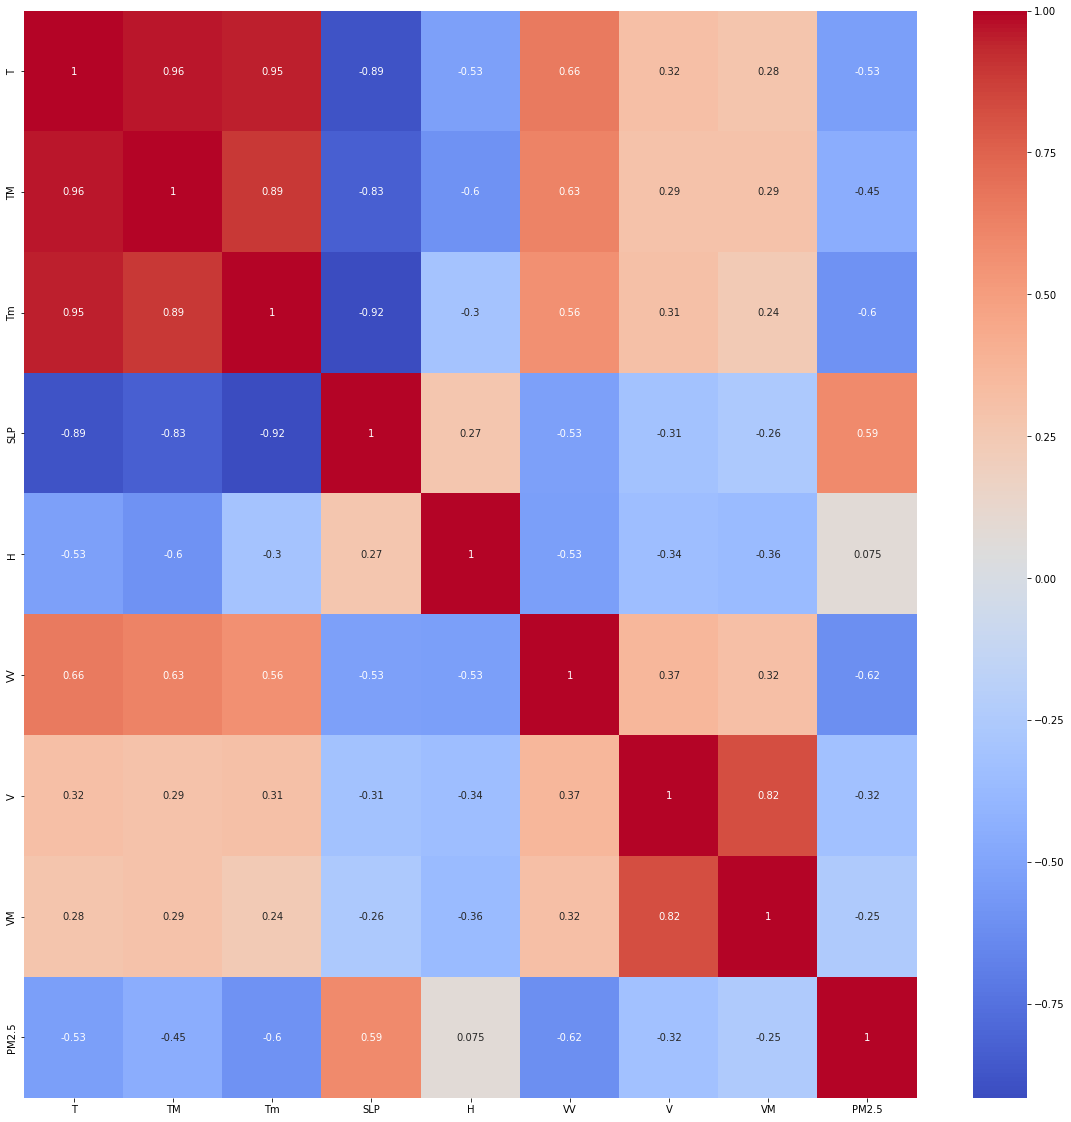

In [ ]:
corrmat = mf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(mf[top_corr_features].corr(),annot=True,cmap="coolwarm")

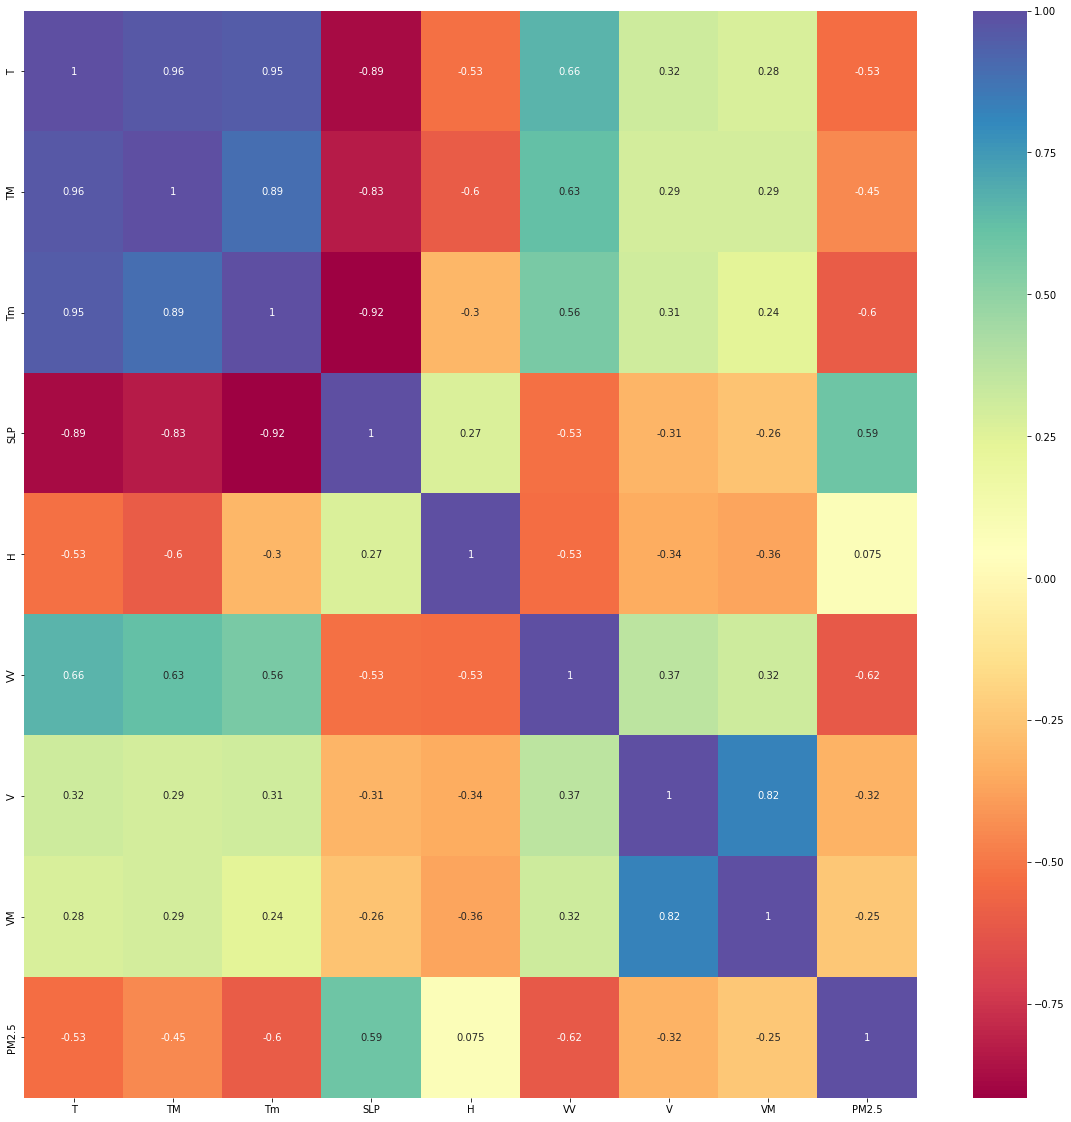

In [ ]:
corrmat = mf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(mf[top_corr_features].corr(),annot=True,cmap="Spectral")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import random

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X=mf.drop("PM2.5",axis=1)
y=mf['PM2.5']


In [ ]:
# model_scores=[]
# for i in set(np.random.randint(100000, size=(1000))):
#   np.random.seed(i)
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#   model = RandomForestRegressor()
#   model.fit(X_train, y_train)
#   model_scores.append(model.score(X_test, y_test))
# model_scores.index(max(model_scores))
# BEST RANDOM SEED IS 93

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7337581834300996

In [ ]:
prediction=model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 26.286922905027936
MSE: 1508.9121466945253
RMSE: 38.8447183886629


In [ ]:
# model.score()

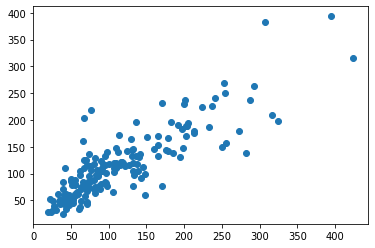

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
mf.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
T,1.000000,0.963478,0.953708,-0.885825,-0.525027,0.655756,0.316325,0.278185,-0.531080
TM,0.963478,1.000000,0.888909,-0.830714,-0.599127,0.625040,0.292714,0.290911,-0.448932
Tm,0.953708,0.888909,1.000000,-0.916159,-0.303525,0.562631,0.309272,0.243862,-0.597467
SLP,-0.885825,-0.830714,-0.916159,1.000000,0.266983,-0.525383,-0.313265,-0.261172,0.593416
H,-0.525027,-0.599127,-0.303525,0.266983,1.000000,-0.530431,-0.340101,-0.364142,0.075068
VV,0.655756,0.625040,0.562631,-0.525383,-0.530431,1.000000,0.368989,0.315713,-0.616031
V,0.316325,0.292714,0.309272,-0.313265,-0.340101,0.368989,1.000000,0.823301,-0.322501
VM,0.278185,0.290911,0.243862,-0.261172,-0.364142,0.315713,0.823301,1.000000,-0.249754
PM2.5,-0.531080,-0.448932,-0.597467,0.593416,0.075068,-0.616031,-0.322501,-0.249754,1.000000


In [ ]:
cv_acc = cross_val_score(model, X, y, cv=5)
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')
cv_acc

The cross-validated accuracy is: 62.57%


array([0.46285547, 0.72261322, 0.59210868, 0.64885152, 0.70210824])

In [ ]:
# list(mf.iloc[180])

In [ ]:
# model.predict(np.array([[14.4, 21.5, 5.5, 1021.0, 60.0, 1.8, 8.9, 18.3]]))

In [ ]:
import pickle
pickle.dump(model, open("AQI_random_forst_model.pkl", "wb"))

In [ ]:
# for_scores=[]
# np.random.seed(93)
# for i in range(1, 150):
#     print(f"Trying model with {i} estimators...")
#     clf = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
#     for_scores.append(clf.score(X_test, y_test))
#     print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
#     print("")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dff=mf.sample(frac=1).reset_index(drop=True)
X=dff.drop("PM2.5",axis=1)
y=dff['PM2.5']


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 24)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 12)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 147, 195, 243, 291, 339, 386, 434, 482, 530, 578, 626, 673, 721, 769, 817, 865, 913, 960, 1008, 1056, 1104, 1152, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 14, 16, 18, 20, 23, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
random.seed(93)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=93, n_jobs = -1)

In [ ]:
# rf_random.fit(X_train,y_train)
# rf_random.best_params_
# rf_random.best_score_
# rf_random.score(X_test, y_test)

In [ ]:
# {'max_depth': 25,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 626}

In [ ]:
import pickle

In [ ]:
model = RandomForestRegressor(max_depth= 25,
max_features= 'auto',
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 626)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7465432312328666

In [ ]:
cv_acc = cross_val_score(model, X, y, cv=5)
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')
cv_acc

The cross-validated accuracy is: 72.31%


array([0.74677819, 0.71657982, 0.73386197, 0.67054958, 0.74782023])

In [ ]:
pickle.dump(model, open("AQI_random_forst_RandomSearchCV.pkl", "wb"))